In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from AGN_plot import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


## Default Model

In [3]:
def plot_default(spe,
                 div=None,
                 d=4,
                 stop=True,
                 ax=None,
                 color=None,
                 label=None,
                 Range=[1e0, 1e7],
                 Dt=True):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))

    j = str(d)
    Abu1 = Abu(j)
    if div != None:
        Abu1.Div(div)
    Abu1.plot(ax=ax, spe=spe, label='X-ray', color=color, Dt=Dt, linewidth=3)
    ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                  fontsize=25)
    if stop:
        j = '0' + str(d)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot(ax=ax,
                  spe=spe,
                  color=color,
                  linestyle='--',
                  label='X-ray removed',
                  Dt=Dt,
                  linewidth=3)

    raw = np.loadtxt('./data/2dis_inf')

    d = r'$n_{\mathrm{H}}$'
    abu = raw[:, eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:, eval('krome_idx_' + div)]
        d = 'n' + div
    if Dt:
        t = raw[:, 0] - 1e6
        ax.set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
    else:
        t = raw[:, 0]
        ax.set_xlabel(r'$t$ (yr)', fontsize=25)
    ax.loglog(t,
              abu,
              label='No X-ray',
              color='black',
              linestyle='-.',
              linewidth=3)
    ax.legend(loc=0, prop={'size': 20})
    ax.set_xlim(Range)

In [4]:
#Embed 
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

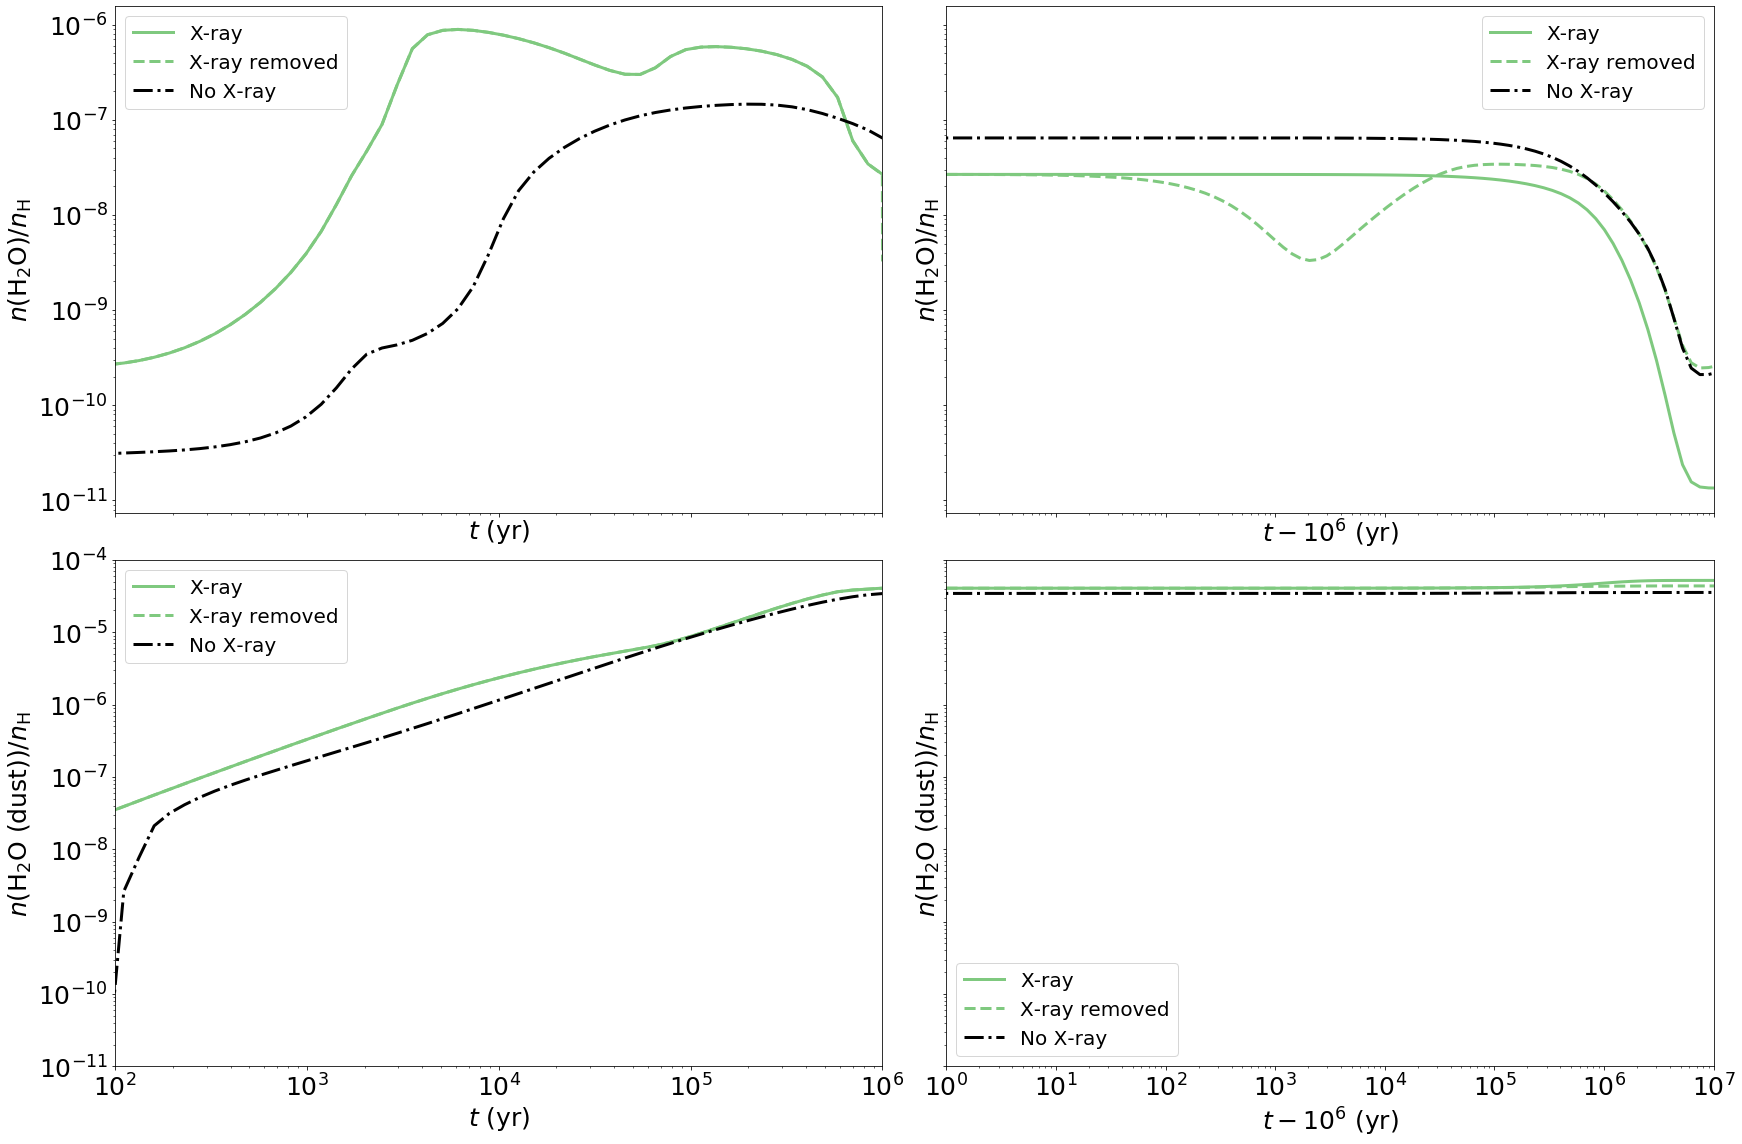

In [5]:
f, ax = plt.subplots(2, 2, figsize=(24, 16), sharex='col', sharey='row')
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('H2O', ax=ax[0], color=c_default[0], Range=[1e2, 1e6], Dt=False)
plot_default('H2O', ax=ax[1], color=c_default[0])

plot_default('H_DUSTH_DUSTO_DUST',
             ax=ax[2],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2O')),
             Range=[1e2, 1e6],
             Dt=False)

plot_default('H_DUSTH_DUSTO_DUST',
             ax=ax[3],
             color=c_default[0],
             label=r'${}$ (dust)'.format(latex_name('H2O')))
#ax[0].set_ylim([1e-11, 5e-6])
#ax[1].set_ylim([1e-11, 5e-6])
ax[2].set_ylim([1e-11, 1e-4])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/default_c.eps')

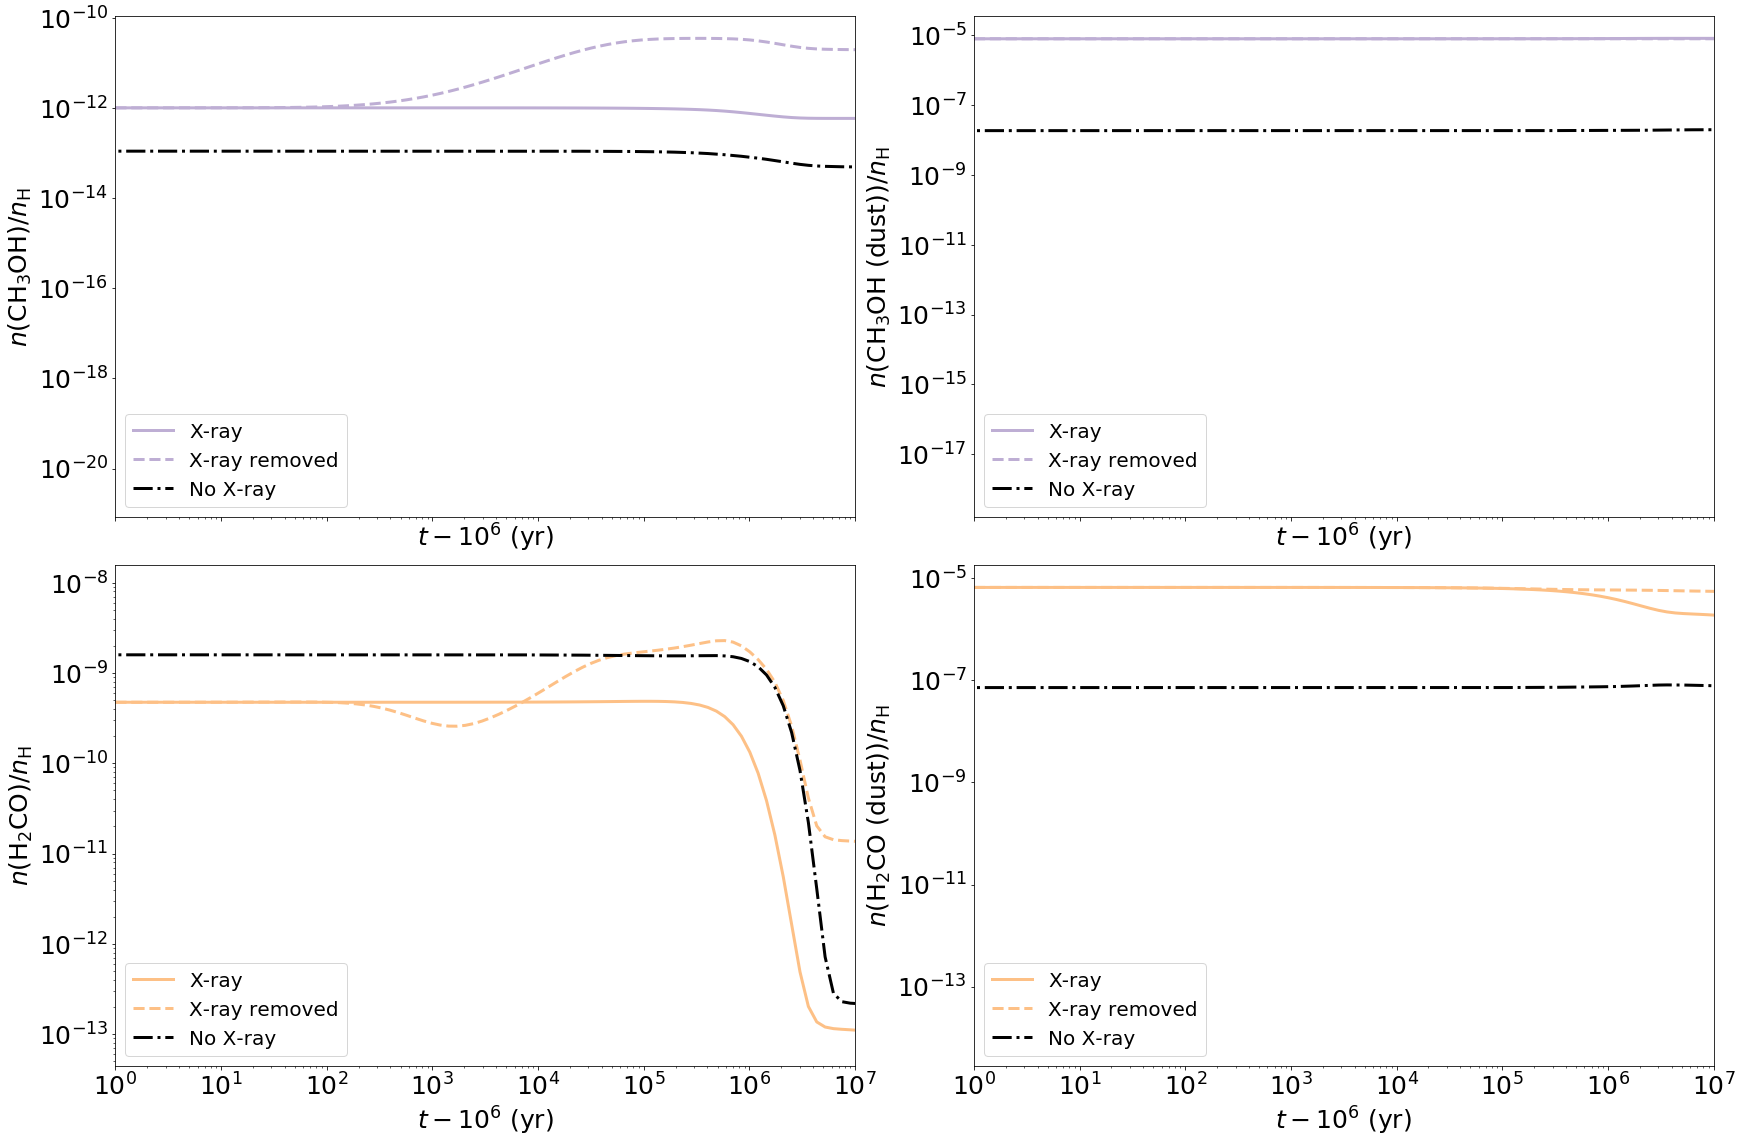

In [6]:
f, ax = plt.subplots(2, 2, figsize=(24, 16), sharex='col')
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_default('CH3OH', ax=ax[0], color=c_default[1])
plot_default('H2CO', ax=ax[2], color=c_default[2])

plot_default('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
             ax=ax[1],
             color=c_default[1],
             label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_default('H_DUSTH_DUSTC_DUSTO_DUST',
             ax=ax[3],
             color=c_default[2],
             label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[2].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[3].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([1e-14, 4e-10])
#ax[1].set_ylim([1e-8, 1e-4])
#ax[2].set_ylim([5e-14, 5e-8])
#ax[3].set_ylim([5e-8, 5e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/otherprebiotic_c.eps')

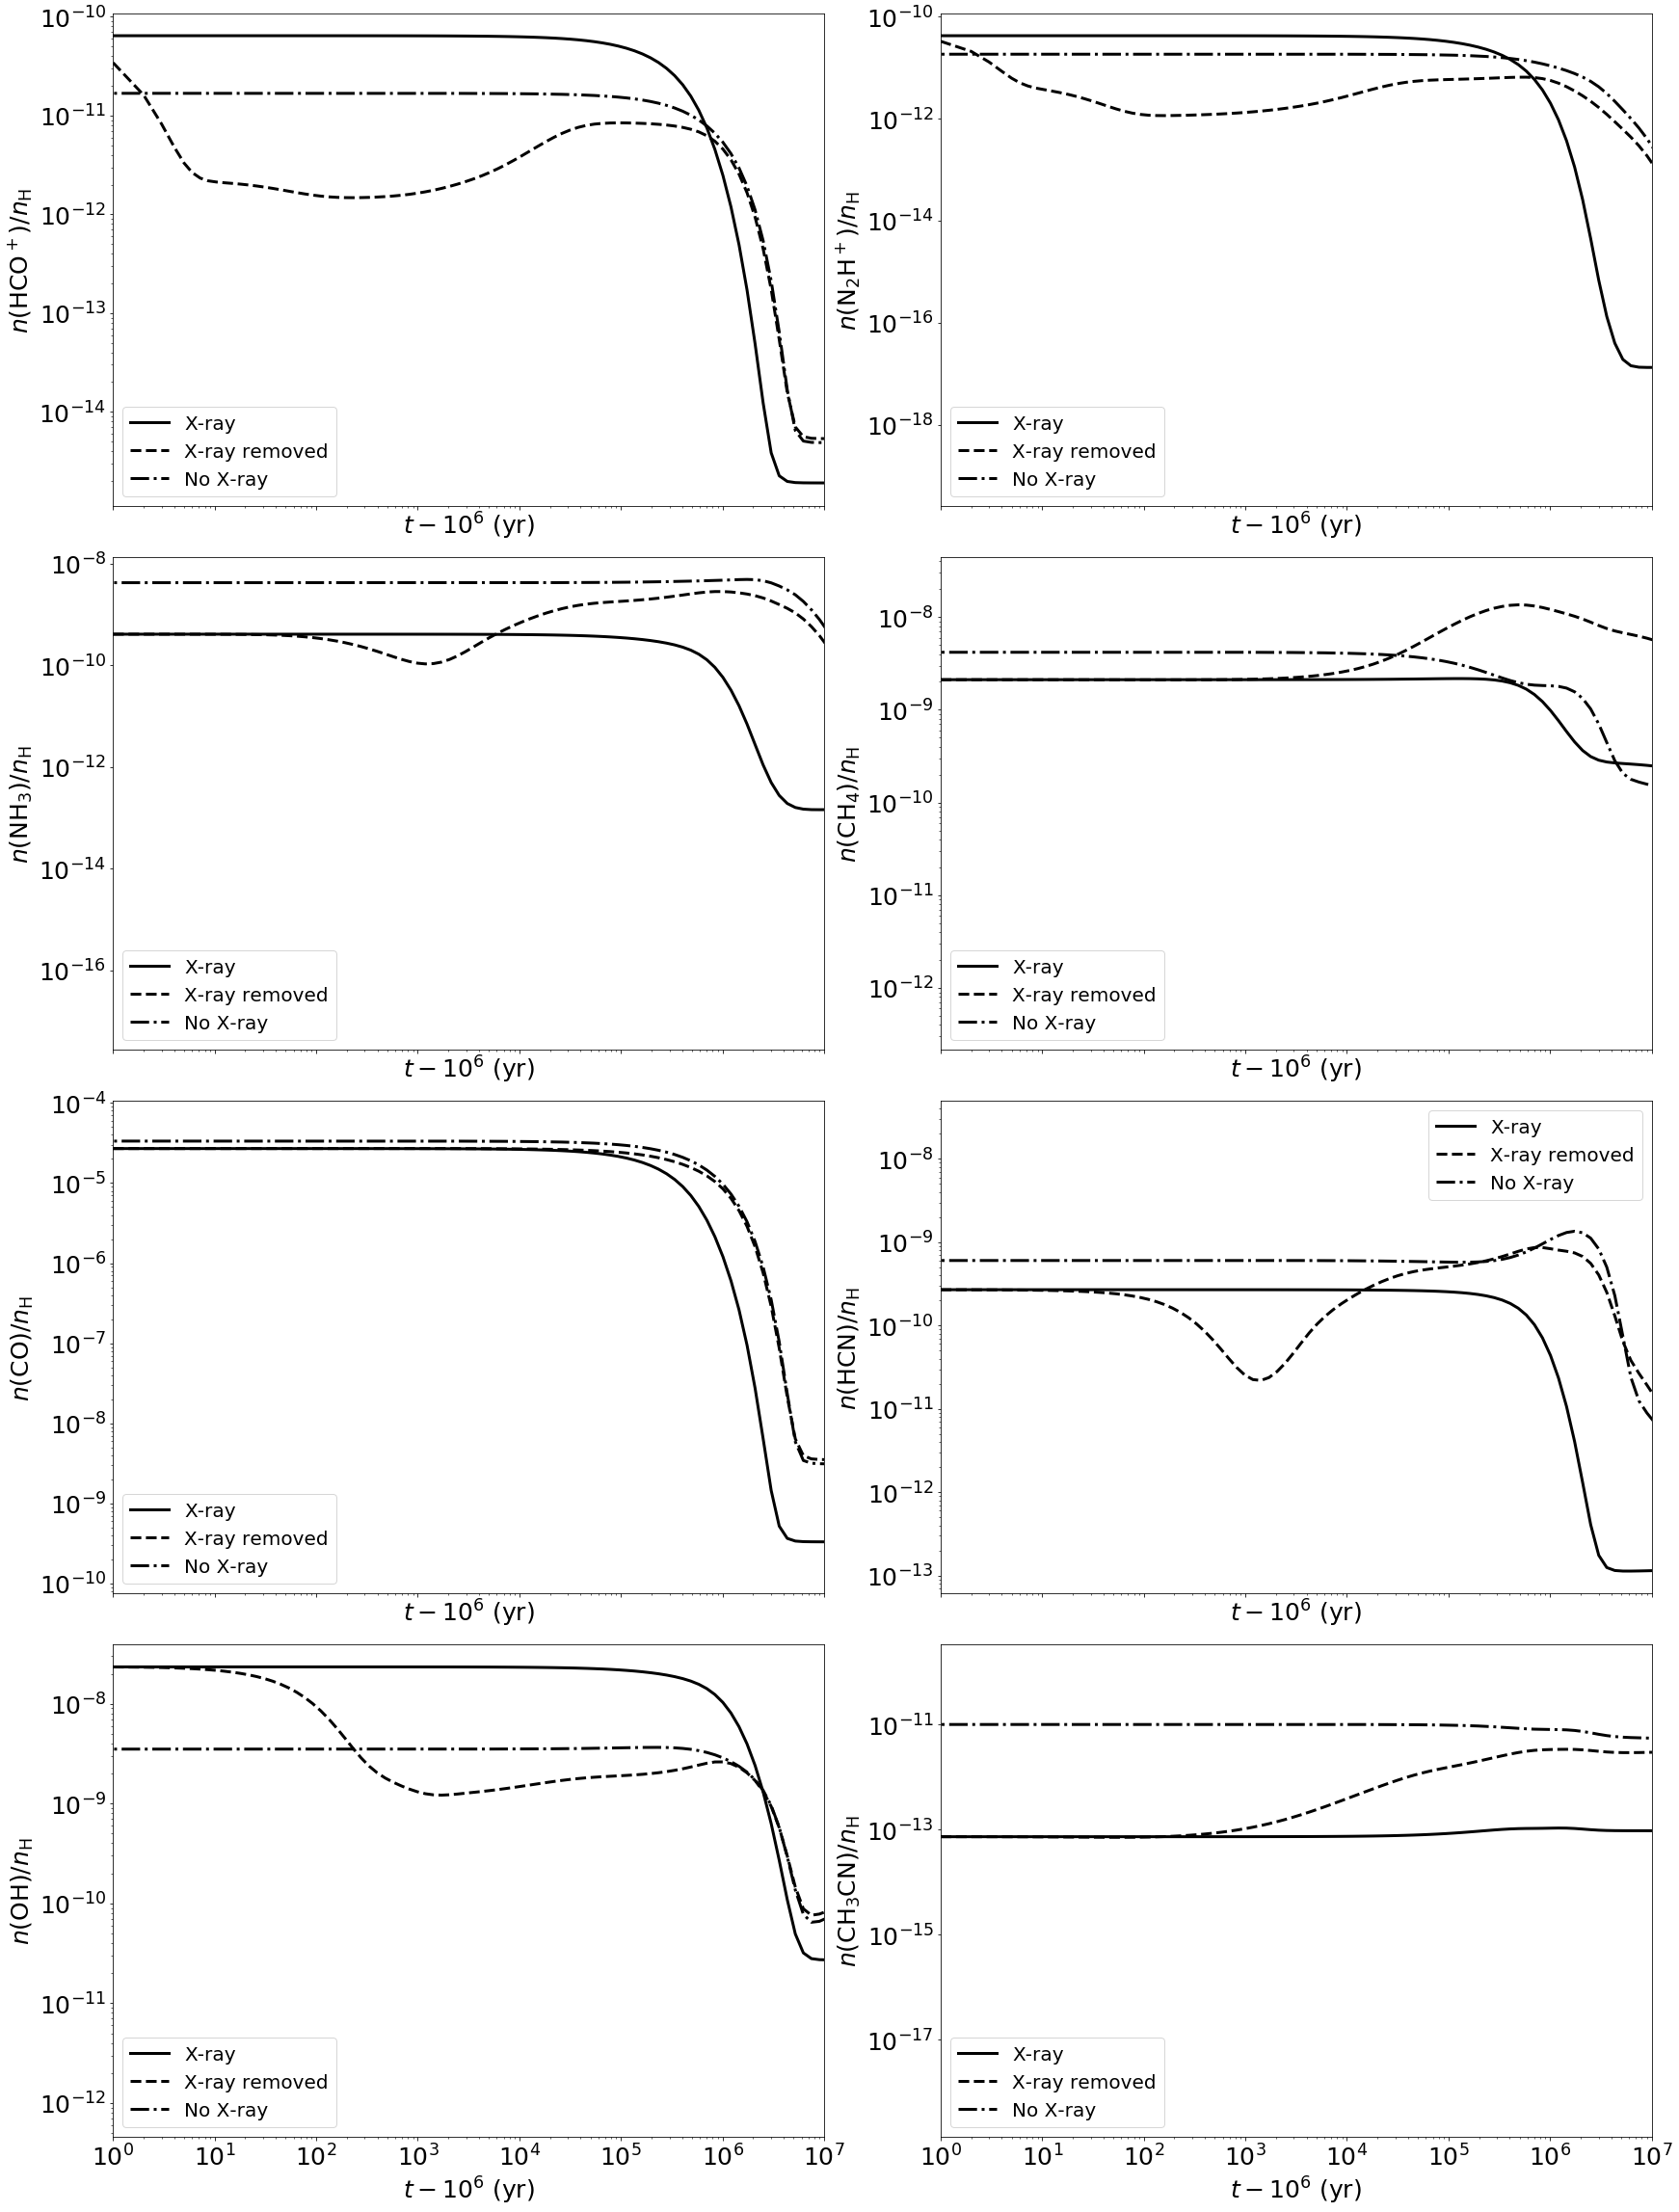

In [26]:
f, ax = plt.subplots(4, 2, figsize=(24, 32), sharex=True)
ax = ax.flatten()

plot_default('HCOj', ax=ax[0], color='black')

plot_default('N2Hj', ax=ax[1], color='black')

plot_default('NH3', ax=ax[2], color='black')

plot_default('CH4', ax=ax[3], color='black')

plot_default('CO', ax=ax[4], color='black')

plot_default('HCN', ax=ax[5], color='black')

plot_default('OH', ax=ax[6], color='black')

plot_default('CH3CN', ax=ax[7], color='black')

ax[6].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[7].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([1e-12, 4e-10])
#ax[1].set_ylim([4e-7, 5e-5])
#ax[3].set_ylim([5e-6, 3e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/appendix_g_c.eps')

[3.8572702e-08 3.8572657e-08 3.8572613e-08 3.8572568e-08 3.8572524e-08
 3.8572479e-08 3.8572426e-08 3.8572362e-08 3.8572285e-08 3.8572192e-08
 3.8572081e-08 3.8571948e-08 3.8571789e-08 3.8571597e-08 3.8571367e-08
 3.8571092e-08 3.8570761e-08 3.8570364e-08 3.8569887e-08 3.8569315e-08
 3.8568629e-08 3.8567806e-08 3.8566817e-08 3.8565632e-08 3.8564209e-08
 3.8562502e-08 3.8560453e-08 3.8557995e-08 3.8555046e-08 3.8551506e-08
 3.8547260e-08 3.8542165e-08 3.8536052e-08 3.8528717e-08 3.8519918e-08
 3.8509362e-08 3.8496697e-08 3.8481505e-08 3.8463283e-08 3.8441431e-08
 3.8415229e-08 3.8383813e-08 3.8346165e-08 3.8301017e-08 3.8246956e-08
 3.8182160e-08 3.8104550e-08 3.8011700e-08 3.7900500e-08 3.7767572e-08
 3.7608541e-08 3.7418770e-08 3.7192108e-08 3.6922469e-08 3.6600935e-08
 3.6218293e-08 3.5765088e-08 3.5227737e-08 3.4593841e-08 3.3848400e-08
 3.2974534e-08 3.1954763e-08 3.0772931e-08 2.9412829e-08 2.7860016e-08
 2.6105023e-08 2.4144956e-08 2.1988731e-08 1.9656506e-08 1.7185009e-08
 1.463

[8.7551433e-07 8.7551690e-07 8.7551946e-07 8.7552203e-07 8.7552460e-07
 8.7552716e-07 8.7553024e-07 8.7553394e-07 8.7553837e-07 8.7554369e-07
 8.7555007e-07 8.7555774e-07 8.7556693e-07 8.7557796e-07 8.7559120e-07
 8.7560709e-07 8.7562615e-07 8.7564903e-07 8.7567648e-07 8.7570942e-07
 8.7574896e-07 8.7579639e-07 8.7585332e-07 8.7592163e-07 8.7600361e-07
 8.7610199e-07 8.7622004e-07 8.7636170e-07 8.7653170e-07 8.7673571e-07
 8.7698052e-07 8.7727431e-07 8.7762688e-07 8.7805000e-07 8.7855776e-07
 8.7916714e-07 8.7989844e-07 8.8077611e-07 8.8182948e-07 8.8309377e-07
 8.8461127e-07 8.8643275e-07 8.8861943e-07 8.9124394e-07 8.9439529e-07
 8.9817815e-07 9.0271991e-07 9.0817429e-07 9.1472283e-07 9.2258808e-07
 9.3203279e-07 9.4337914e-07 9.5700624e-07 9.7338003e-07 9.9304364e-07
 1.0166588e-06 1.0450189e-06 1.0790574e-06 1.1198847e-06 1.1687970e-06
 1.2273036e-06 1.2971260e-06 1.3801626e-06 1.4784524e-06 1.5940824e-06
 1.7289874e-06 1.8846740e-06 2.0616792e-06 2.2591162e-06 2.4738404e-06
 2.699

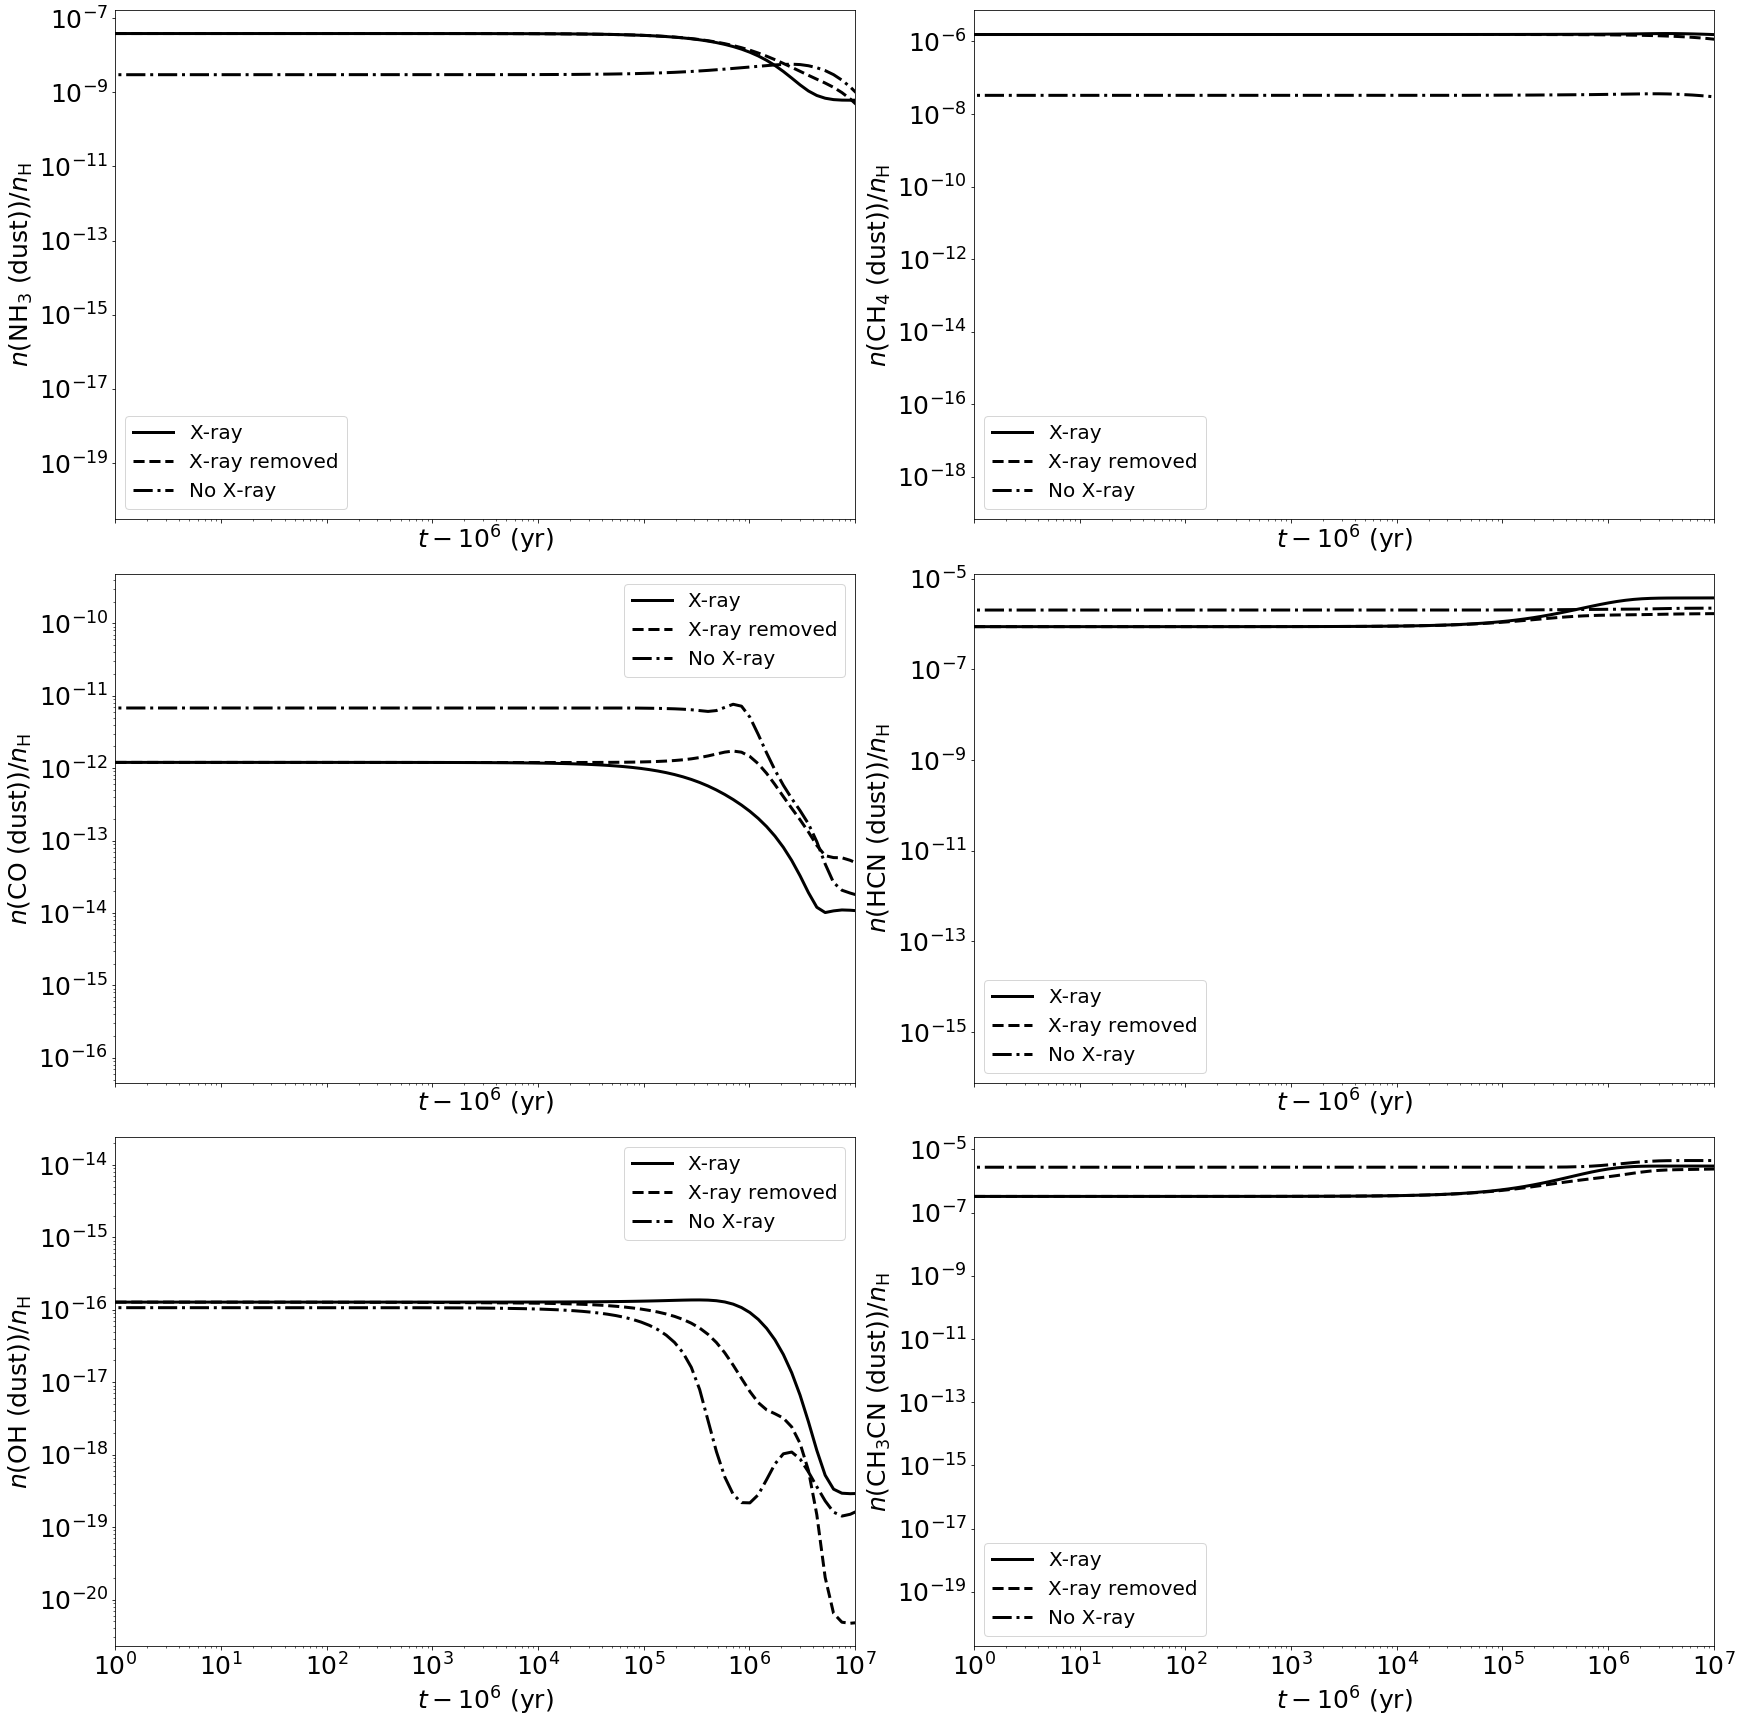

In [37]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()

plot_default('N_DUSTH_DUSTH_DUSTH_DUST',
             ax=ax[0],
             color='black',
             label=r'${}$ (dust)'.format(latex_name('NH3')))

plot_default('C_DUSTH_DUSTH_DUSTH_DUSTH_DUST',
             ax=ax[1],
             color='black',
             label=r'${}$ (dust)'.format(latex_name('CH4')))

plot_default('C_DUSTO_DUST',
             ax=ax[2],
             color='black',
             label=r'${}$ (dust)'.format(latex_name('CO')))

plot_default('H_DUSTC_DUSTN_DUST',
             ax=ax[3],
             color='black',
             label=r'${}$ (dust)'.format(latex_name('HCN')))

plot_default('O_DUSTH_DUST',
             ax=ax[4],
             color='black',
             label=r'${}$ (dust)'.format(latex_name('OH')))

plot_default('C_DUSTH_DUSTH_DUSTH_DUSTC_DUSTN_DUST',
             ax=ax[5],
             color='black',
             label=r'${}$ (dust)'.format(latex_name('CH3CN')))

ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([1e-12, 4e-10])
#ax[1].set_ylim([4e-7, 5e-5])
#ax[3].set_ylim([5e-6, 3e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/appendix_d_c.eps')

## Galactic Distribution

In [30]:
def plot_dis(spe, div=None, d=4, stop=True, ax=None, color=None, label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))
    for i, d in enumerate([1,2,4,8]):
        j = str(d)
        Abu1 = Abu(j)
        if div != None:
            Abu1.Div(div)

        Abu1.plot(ax=ax, spe=spe, label='{} kpc'.format(d), color=color[i])
        ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                          fontsize=25)
        ax.set_xlim([1e0, 1e8])
        if stop:
            j = '0' + str(d)
            Abu0 = Abu(j)
            if div != None:
                Abu.Div(div)
            Abu0.plot(ax=ax, spe=spe, color=color[i], linestyle='--', label=None)
        
    
    raw = np.loadtxt('./data/2dis_inf')
    t = raw[:, 0] - 1e6
    d = r'$n_{\mathrm{H}}$'
    abu = raw[:, eval('krome_idx_' + spe)]
    if div != None:
        abu /= raw[:, eval('krome_idx_' + div)]
        d = 'n' + div
    ax.loglog(t,
              abu,
              label='No X-ray',
              color='black',
              linestyle='-.',
              linewidth=3)
    ax.legend(loc=0, prop={'size': 20})

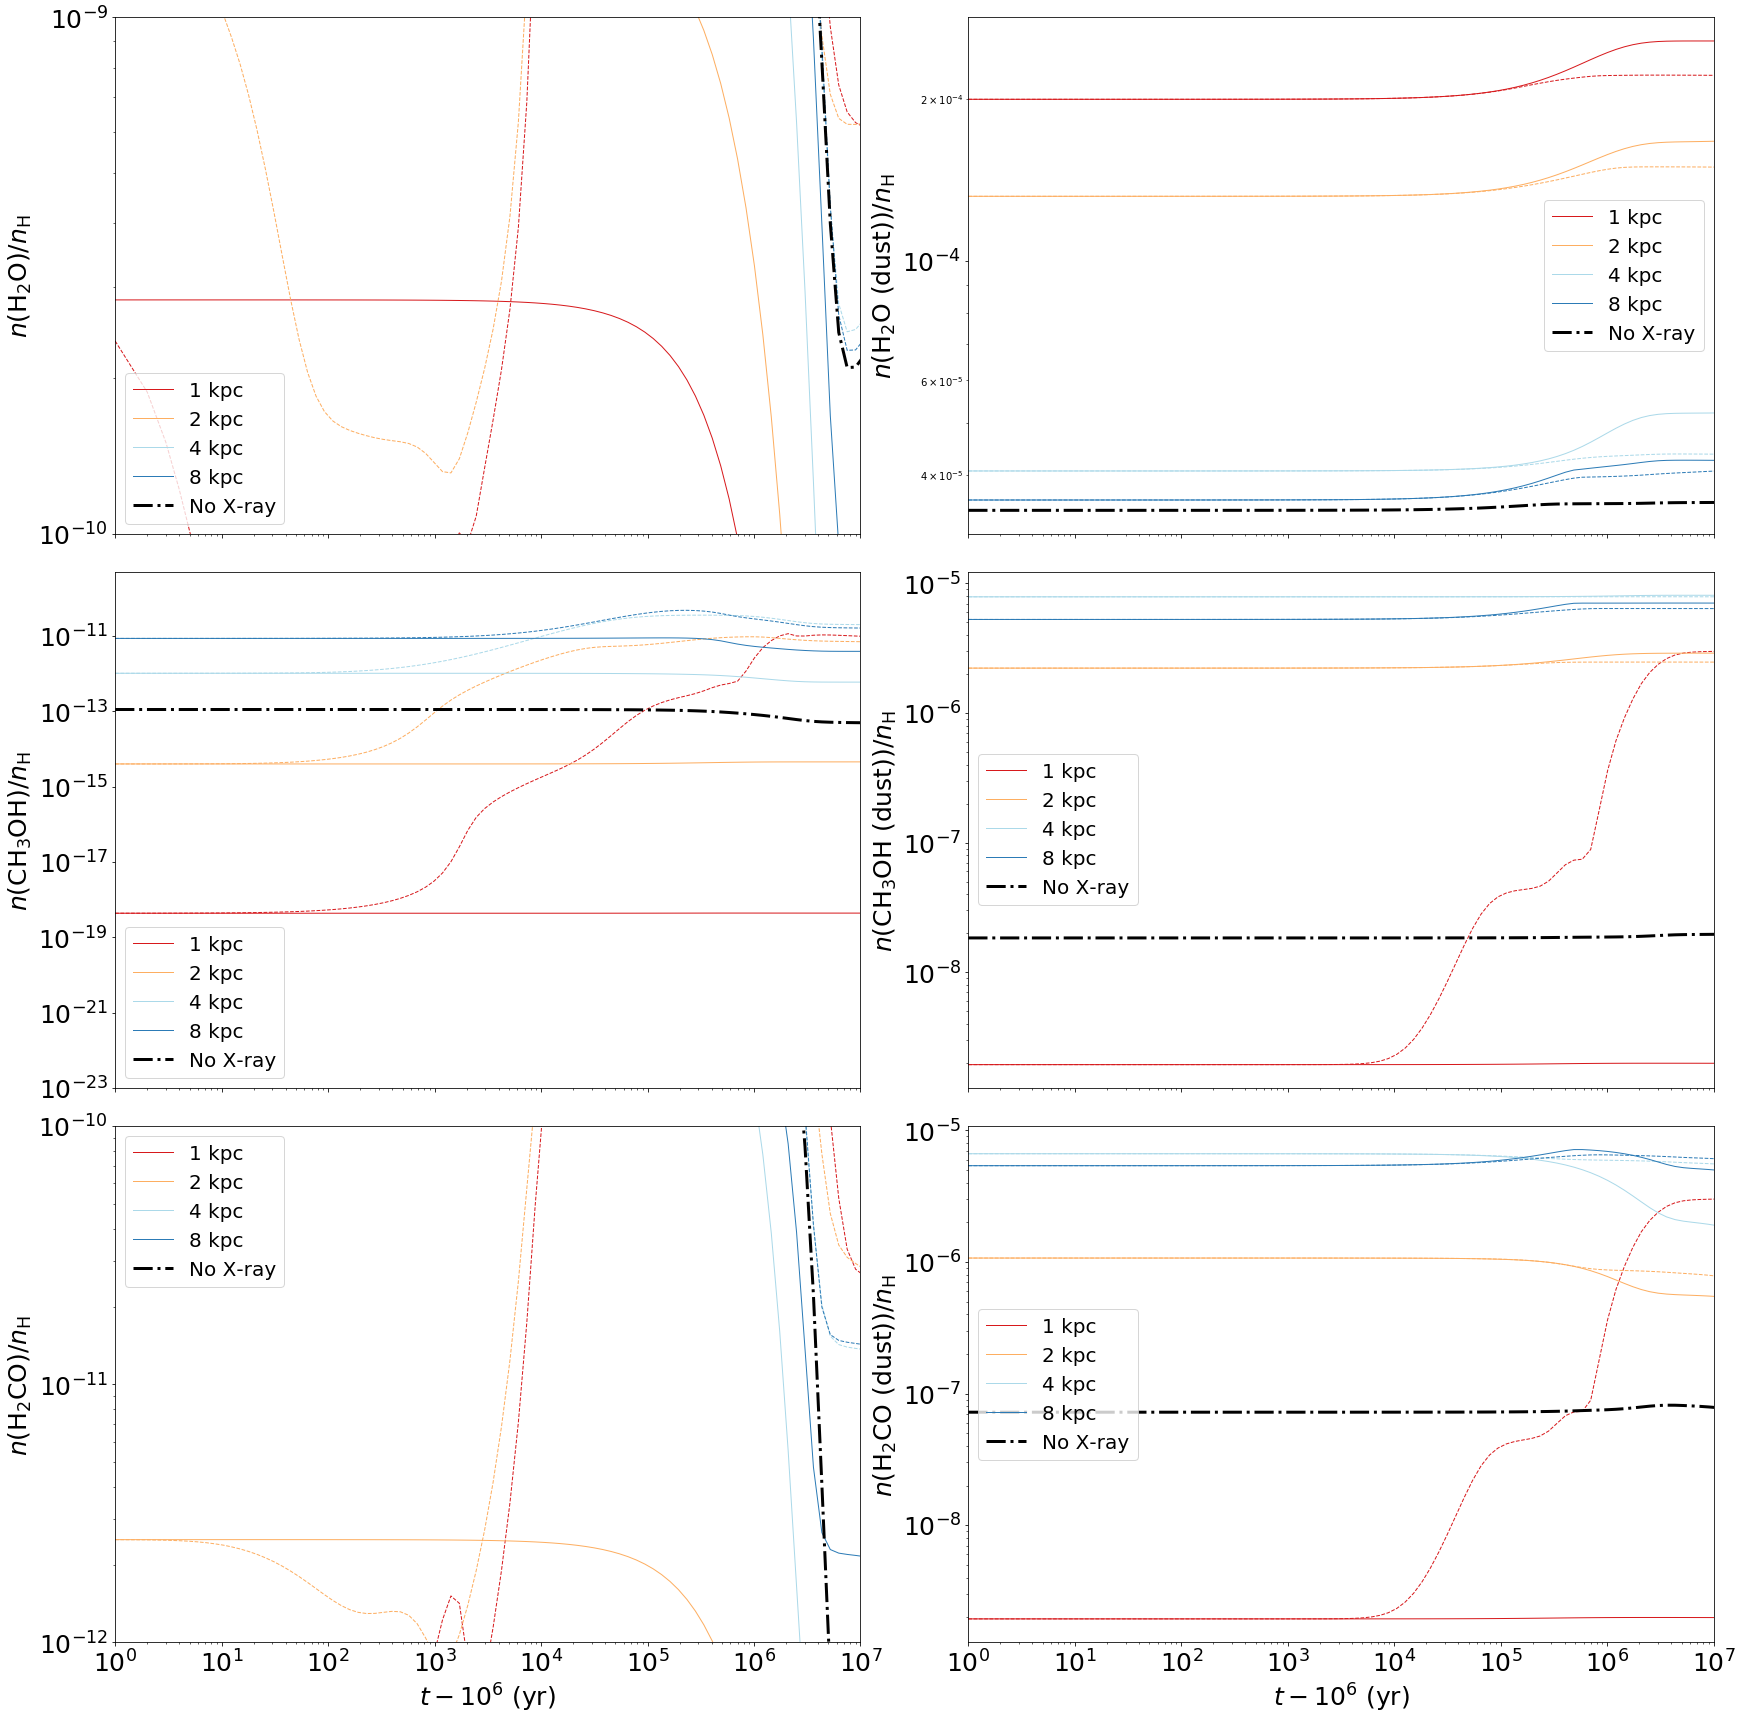

In [7]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_dis = ['#d7191c', '#fdae61', '#abd9e9', '#2c7bb6']

plot_dis('H2O', ax=ax[0], color=c_dis)
plot_dis('CH3OH', ax=ax[2], color=c_dis)
plot_dis('H2CO', ax=ax[4], color=c_dis)

plot_dis('H_DUSTH_DUSTO_DUST',
         ax=ax[1],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_dis('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
         ax=ax[3],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_dis('H_DUSTH_DUSTC_DUSTO_DUST',
         ax=ax[5],
         color=c_dis,
         label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
#ax[0].set_ylim([1e-10, 1e-9])
#ax[1].set_ylim([1e-5, 3e-4])
#ax[2].set_ylim([1e-23, 5e-10])
#ax[3].set_ylim([1e-11, 2e-5])
#ax[4].set_ylim([1e-12, 1e-10])
#ax[5].set_ylim([1e-11, 2e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/galactic_distribution_c.eps')

## Different depths inside a molecular cloud

In [10]:
def plot_col(spe, div=None, d=4, stop=True, ax=None, color=None, label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label == None:
        label = r'${}$'.format(latex_name(spe))
    j = str(d)
    Abu1 = Abu(j)
    if div != None:
        Abu1.Div(div)

    ax.set_ylabel(r'$n(${}$)$'.format(label) + '/' + Abu1.name_div,
                  fontsize=25)
    ax.set_xlim([1e0, 1e7])
    if stop:
        j = '0' + str(d)
        Abu0 = Abu(j)
        if div != None:
            Abu.Div(div)
        Abu0.plot_l(ax=ax, spe=spe, color=color, Nolabel=False)
        Abu0.plot(ax=ax,
                  spe=spe,
                  color=color,
                  linestyle='--',
                  label=r'$N_{\mathrm{H}}=10^{22.5}$ cm$^{-2}$',
                  linewidth=3)
        Abu0.plot_u(ax=ax, spe=spe, color=color, Nolabel=False)

    Abu_inf = Abu('_inf')
    Abu_inf.plot_l(ax=ax, spe=spe, color='black', Nolabel=False, NoX=True)
    Abu_inf.plot(ax=ax,
                 spe=spe,
                 label=r'No X-ray, $N_{\mathrm{H}}=10^{22.5}$ cm$^{-2}$',
                 color='black',
                 linestyle='--')
    Abu_inf.plot_u(ax=ax, spe=spe, color='black', Nolabel=False, NoX=True)
    ax.legend(loc=0, prop={'size': 20})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

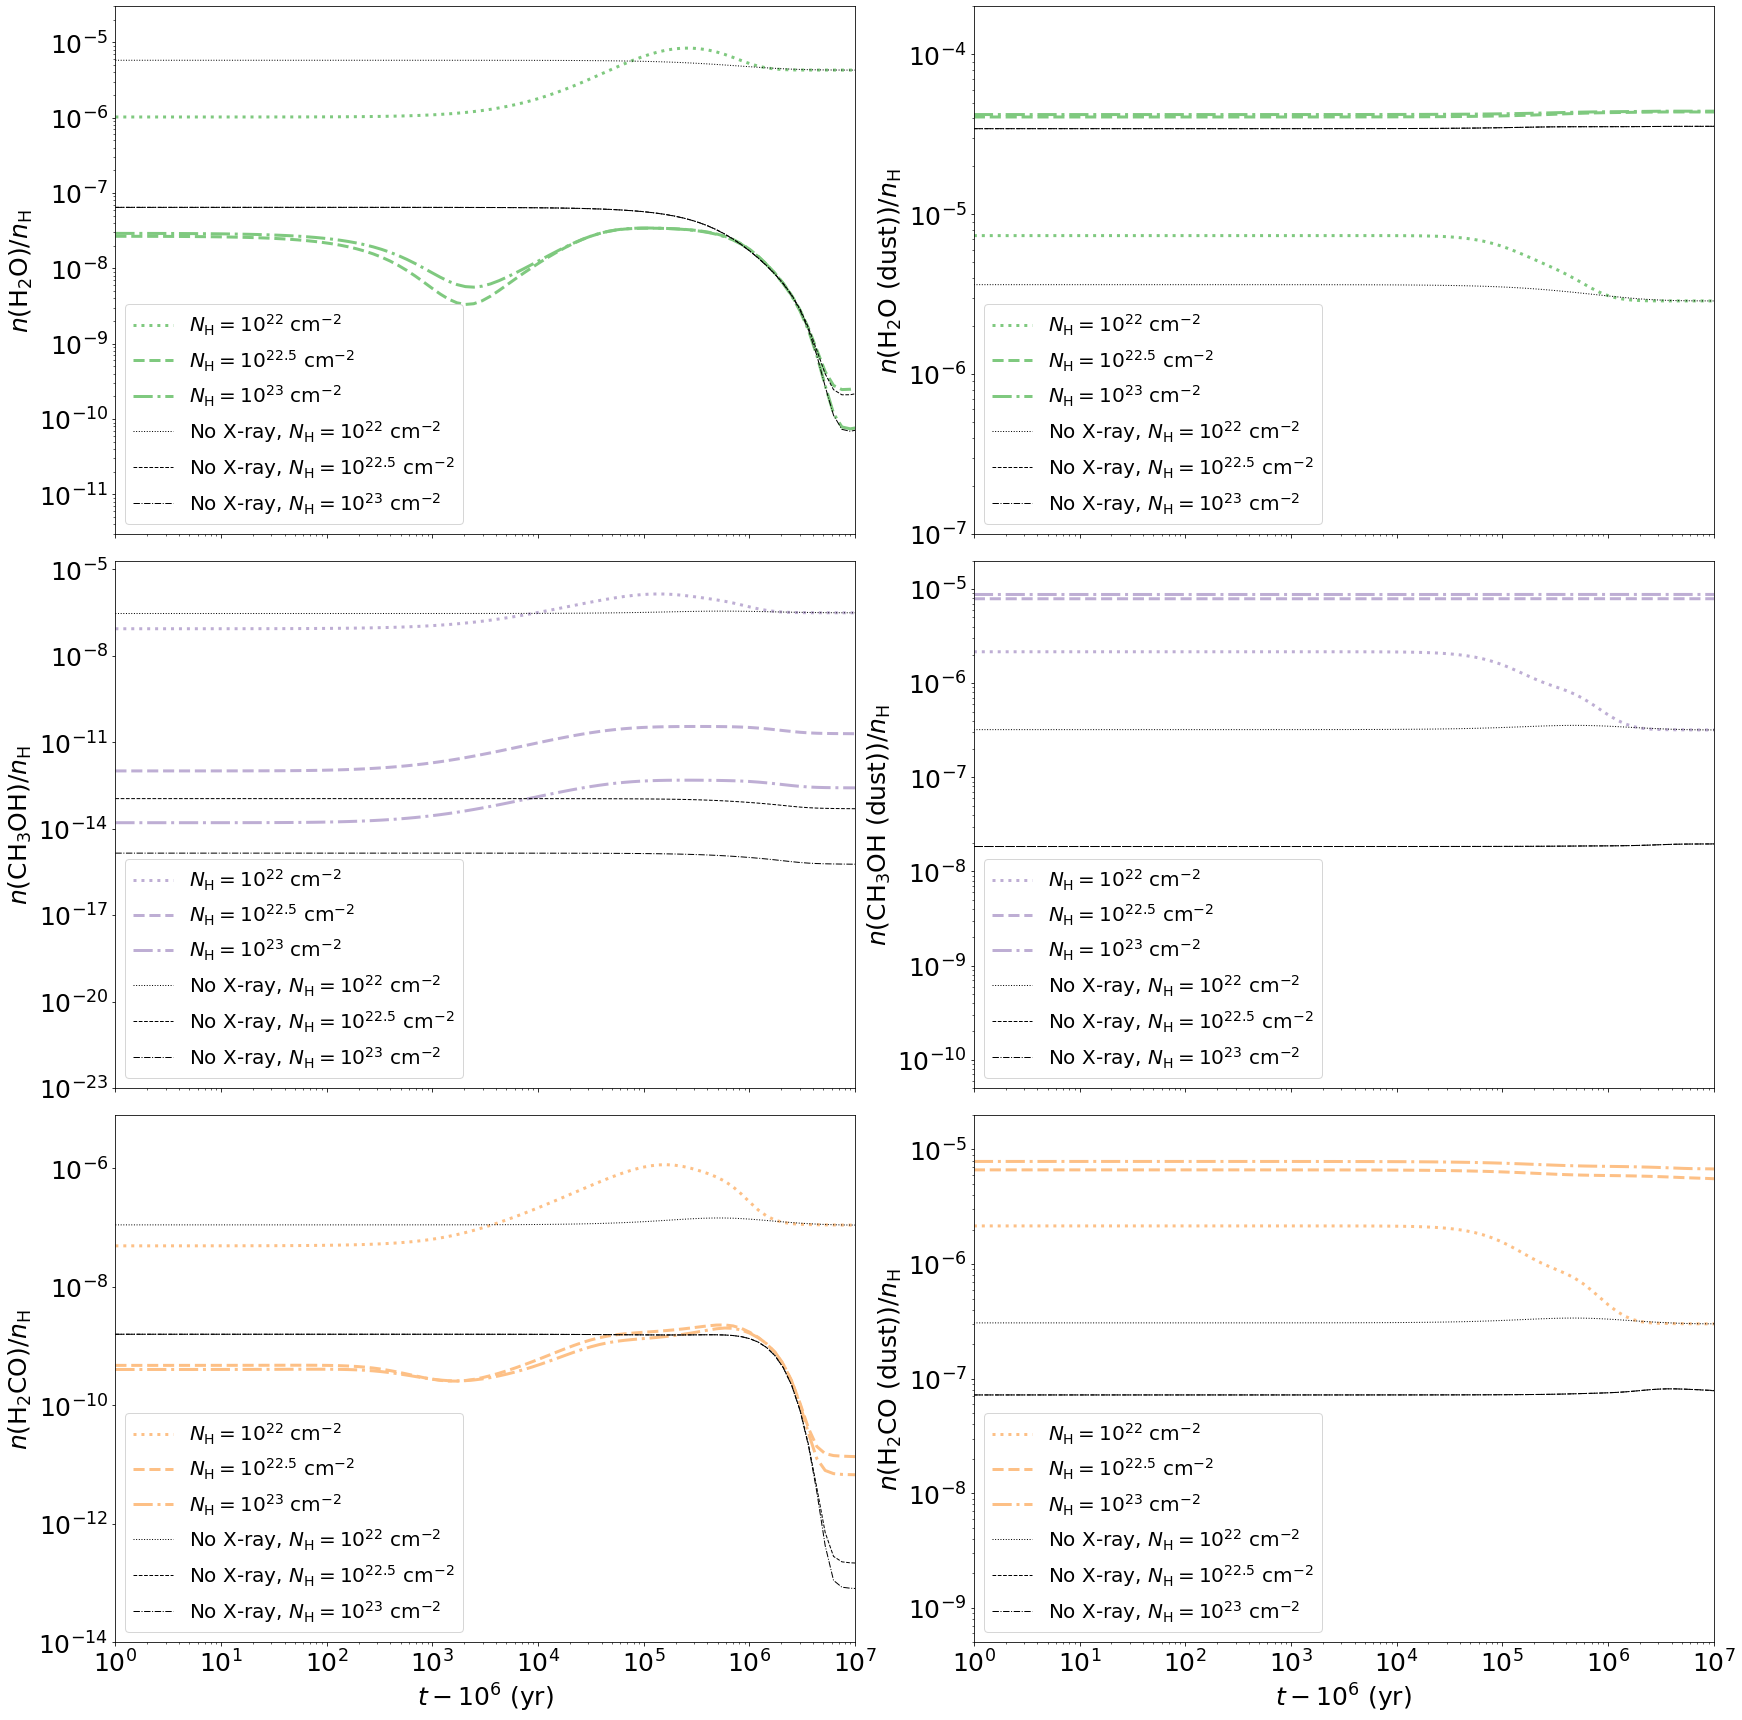

In [12]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_col('H2O', ax=ax[0], color=c_default[0])
plot_col('CH3OH', ax=ax[2], color=c_default[1])
plot_col('H2CO', ax=ax[4], color=c_default[2])

plot_col('H_DUSTH_DUSTO_DUST',
         ax=ax[1],
         color=c_default[0],
         label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_col('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
         ax=ax[3],
         color=c_default[1],
         label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_col('H_DUSTH_DUSTC_DUSTO_DUST',
         ax=ax[5],
         color=c_default[2],
         label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[0].set_ylim([3e-12, 3e-5])
ax[1].set_ylim([1e-7, 2e-4])
ax[2].set_ylim([1e-23, 2e-5])
ax[3].set_ylim([5e-11, 2e-5])
ax[4].set_ylim([1e-14, 8e-6])
ax[5].set_ylim([5e-10, 2e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/column_density_c.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

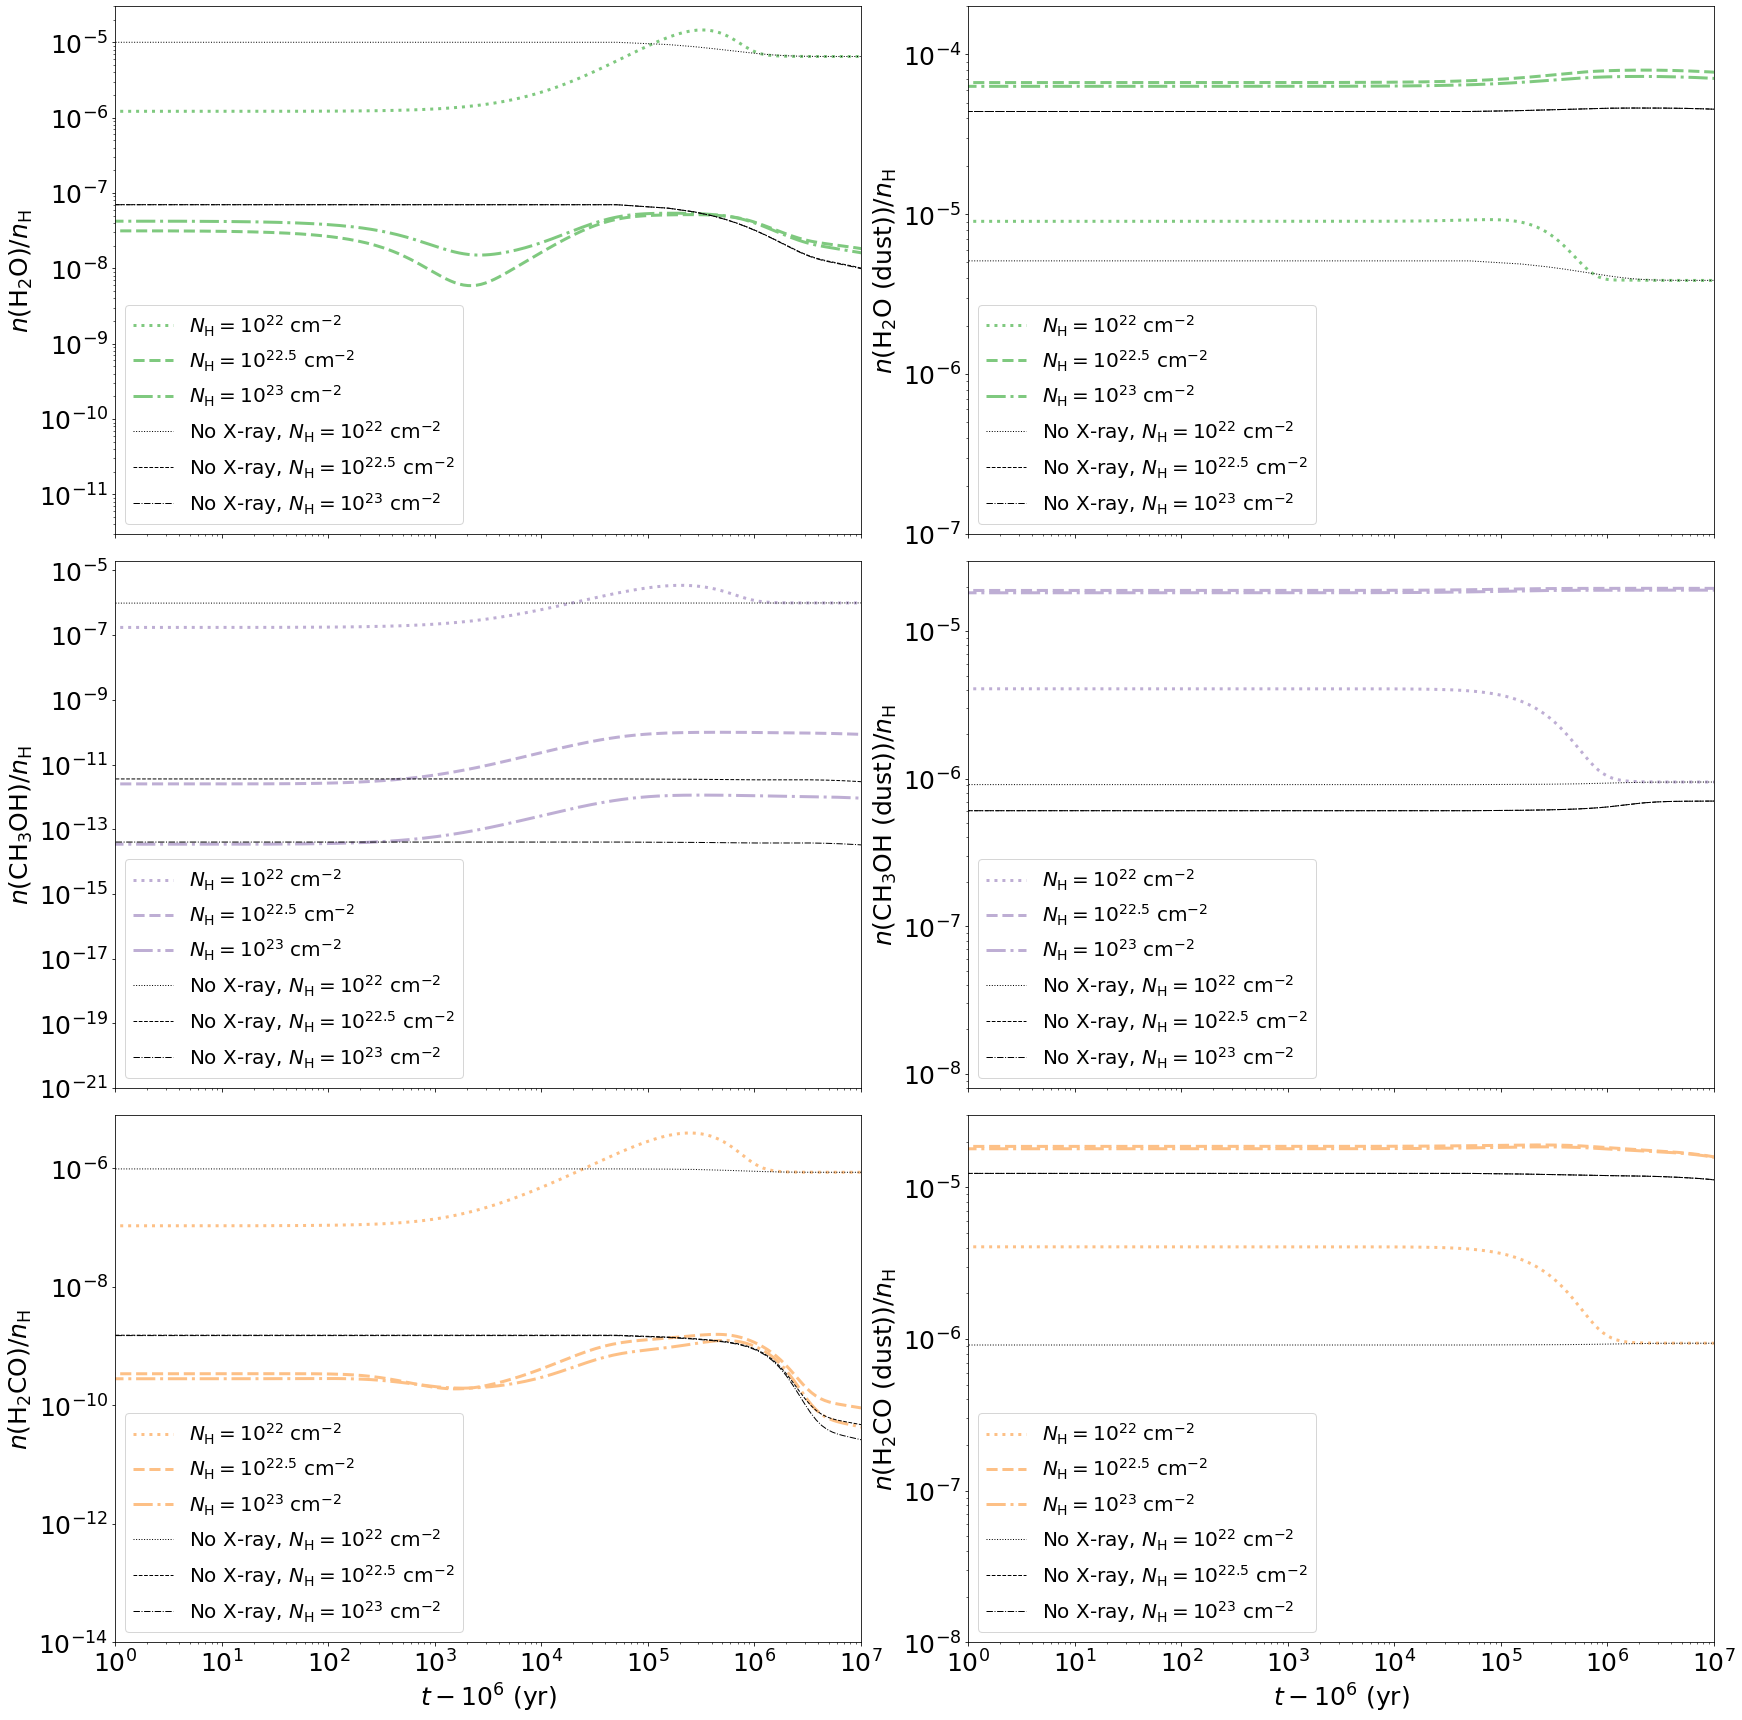

In [15]:
f, ax = plt.subplots(3, 2, figsize=(24, 24), sharex=True)
ax = ax.flatten()
c_default = ['#7fc97f', '#beaed4', '#fdc086']

plot_col('H2O', ax=ax[0], color=c_default[0])
plot_col('CH3OH', ax=ax[2], color=c_default[1])
plot_col('H2CO', ax=ax[4], color=c_default[2])

plot_col('H_DUSTH_DUSTO_DUST',
         ax=ax[1],
         color=c_default[0],
         label=r'${}$ (dust)'.format(latex_name('H2O')))
plot_col('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
         ax=ax[3],
         color=c_default[1],
         label=r'${}$ (dust)'.format(latex_name('CH3OH')))
plot_col('H_DUSTH_DUSTC_DUSTO_DUST',
         ax=ax[5],
         color=c_default[2],
         label=r'${}$ (dust)'.format(latex_name('H2CO')))
ax[4].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[5].set_xlabel(r'$t-10^6$ (yr)', fontsize=25)
ax[0].set_ylim([3e-12, 3e-5])
ax[1].set_ylim([1e-7, 2e-4])
ax[2].set_ylim([1e-21, 2e-5])
ax[3].set_ylim([8e-9, 3e-5])
ax[4].set_ylim([1e-14, 8e-6])
ax[5].set_ylim([1e-8, 3e-5])
for a in ax:
    a.tick_params(labelsize=25)
plt.tight_layout()
#plt.savefig('../../../Report/Fig/column_density.eps')